In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
import lightgbm as lgb

In [2]:
train = pd.read_csv('data/train_set.csv')
test = pd.read_csv('data/test_set.csv')

train.rename(columns={ 'pos_adress_lat' : 'pos_address_lat', 
                       'pos_adress_lon' : 'pos_address_lon'}, inplace=True)

D:\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
len(train.columns)

18

In [ ]:
train['pos_adress_lat'].

In [36]:
a = pd.DataFrame()

In [38]:
a['ab'] = 0,1
a['bc'] = 2,3
a

,ab,bc
0,0,2
1,1,3


In [39]:
a.rename(columns={ 'ab' : 'abc'}, inplace=True)

In [40]:
a

,abc,bc
0,0,2
1,1,3


In [4]:
train.head()

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,NaN,NaN,NaN,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177


In [5]:
test.head()

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date
0,2.211818,NaN,NaN,NaN,IVANTEEVKA,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,"5,411",2-1 TOLMACHEVA STRIVANTEEVKA141280 RUSRUS,55.967487,37.913682,ff0476dae4b098a7b16aabe93d4268df,2017-08-24
1,1.331379,NaN,NaN,NaN,IVANTEEVKA,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,"4,111","SOVETSKIJ, 32IVANTEEVKA141282 RUSRUS",55.971296,37.905184,7cfd9a60282459d4692ecc85b856072e,2017-08-12
2,2.608004,NaN,NaN,NaN,PUSHKINO,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,"5,411","105,KRASOARMEYSKOE SHPUSHKINO141206 RUSRUS",56.016591,37.909098,7e5a532f0029861d8a9c4f0479b9450b,2017-06-17
3,1.916752,NaN,NaN,NaN,IVANTEEVKA,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,"5,411","G. IVANTEEVKA, UL.TOLMACHEVA, D.6IVANTEEVKA141...",55.964507,37.937912,2afe7d1bc61b86c449f413bdf2119032,2017-08-12
4,1.981067,NaN,NaN,NaN,MOSCOW,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,"5,814",5 KOMSOMOLSKAYA SQMOSCOW101000 RUSRUS,55.776802,37.657352,ab4f00601ff1d949afc59ee3f804c79c,2017-04-26


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224734 entries, 0 to 1224733
Data columns (total 18 columns):
amount              1224734 non-null float64
atm_address         269473 non-null object
atm_address_lat     184680 non-null float64
atm_address_lon     184680 non-null float64
city                1224725 non-null object
country             1224734 non-null object
currency            1224690 non-null float64
customer_id         1224734 non-null object
home_add_lat        1224718 non-null float64
home_add_lon        1224718 non-null float64
mcc                 1224734 non-null int64
pos_address         924991 non-null object
pos_adress_lat      942614 non-null float64
pos_adress_lon      942614 non-null float64
terminal_id         1224705 non-null object
transaction_date    1224690 non-null object
work_add_lat        664660 non-null float64
work_add_lon        664660 non-null float64
dtypes: float64(10), int64(1), object(7)
memory usage: 168.2+ MB


In [28]:
train.describe()

,amount,atm_address_lat,atm_address_lon,currency,home_add_lat,home_add_lon,mcc,pos_adress_lat,pos_adress_lon,work_add_lat,work_add_lon
count,1.224734e+06,184680.000000,184680.000000,1.224690e+06,1.224718e+06,1.224718e+06,1.224734e+06,942614.000000,942614.000000,664660.000000,664660.000000
mean,2.828950e+00,56.070154,40.256464,6.440719e+02,5.613301e+01,4.067607e+01,5.698178e+03,56.179663,40.317367,56.232291,40.453782
std,7.247219e-01,3.437232,12.830634,2.196238e+01,3.349861e+00,1.360609e+01,5.007560e+02,3.306415,13.334232,3.163262,13.414844
min,-2.012356e+00,42.053000,20.169000,8.000000e+00,4.211100e+01,1.991000e+01,5.000000e+01,42.102032,19.887847,43.110000,19.911000
25%,2.328945e+00,55.648000,36.412000,6.430000e+02,5.561500e+01,3.619200e+01,5.411000e+03,55.646963,36.054865,55.702000,36.565000
50%,2.738351e+00,55.781000,37.602000,6.430000e+02,5.580100e+01,3.759200e+01,5.812000e+03,55.789848,37.587280,55.776000,37.594000
75%,3.279038e+00,59.122000,37.928000,6.430000e+02,5.911800e+01,3.844000e+01,6.011000e+03,59.117524,37.972392,59.134000,37.820000
max,6.075307e+00,69.361000,142.735000,9.850000e+02,6.939900e+01,1.508440e+02,9.402000e+03,71.581001,159.892567,64.597000,142.742000


In [29]:
train.shape

(1224734, 18)

In [30]:
train.columns

Index(['amount', 'atm_address', 'atm_address_lat', 'atm_address_lon', 'city',
       'country', 'currency', 'customer_id', 'home_add_lat', 'home_add_lon',
       'mcc', 'pos_address', 'pos_adress_lat', 'pos_adress_lon', 'terminal_id',
       'transaction_date', 'work_add_lat', 'work_add_lon'],
      dtype='object')

In [41]:
test.columns

Index(['amount', 'atm_address', 'atm_address_lat', 'atm_address_lon', 'city',
       'country', 'currency', 'customer_id', 'mcc', 'pos_address',
       'pos_address_lat', 'pos_address_lon', 'terminal_id',
       'transaction_date'],
      dtype='object')

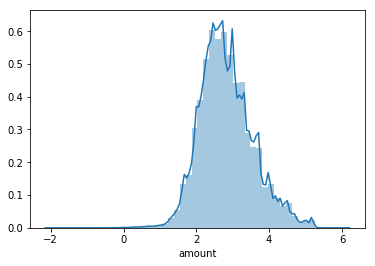

In [31]:
sns.distplot(train['amount'])

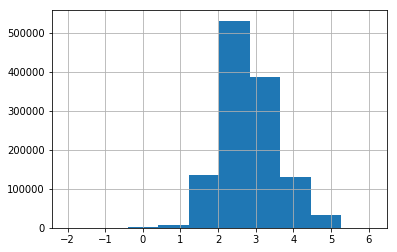

In [32]:
train['amount'].hist();

In [33]:
train.describe(include=['object'])

,atm_address,city,country,customer_id,pos_address,terminal_id,transaction_date
count,269473,1224725,1224734,1224734,924991,1224705,1224690
unique,17693,7085,127,10000,88957,208383,316
top,"Череповец, ул. Мира, д. 30",MOSCOW,RUS,f1075f6513de30f64d69cef2e4bb7b35,"VOLGOGRADSKIIY PR-T, 42MOSKVA 109316 ...",9663c3a3f047f284926a166405f30856,2017-06-09
freq,1488,267527,1214411,1891,1513,622,7051


In [35]:
train['atm_address'].value_counts()[:10]

Череповец, ул. Мира, д. 30                                                 1488
Санкт-Петербург, ш. Левашовское, д. 20А, Курортный район, г. Сестрорецк    1072
Санкт-Петербург, бул. Новаторов, д. 11                                      994
Санкт-Петербург, ул. Смоленская, д. 18А                                     967
Санкт-Петербург, пр. Комендантский, д. 13, корп.1                           919
Москва, ул. Василисы Кожиной, д. 1, корп.1                                  862
Санкт-Петербург, пр. Большевиков, д. 3, корп.1, стр.А                       857
Санкт-Петербург, пр. Просвещения, д. 36/141А                                805
Санкт-Петербург, пр. Московский, д. 216                                     796
Подольск, пр. Революционный, д. 62                                          763
Name: atm_address, dtype: int64

In [5]:
train.columns

Index(['amount', 'atm_address', 'atm_address_lat', 'atm_address_lon', 'city',
       'country', 'currency', 'customer_id', 'home_add_lat', 'home_add_lon',
       'mcc', 'pos_address', 'pos_address_lat', 'pos_address_lon',
       'terminal_id', 'transaction_date', 'work_add_lat', 'work_add_lon'],
      dtype='object')

In [21]:
X_train = train.drop(['home_add_lat', 'home_add_lon','work_add_lat', 'work_add_lon'], axis=1)

In [23]:
X_train[:2]

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15
1,2.775633,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,5261,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27


In [24]:
Y_train_home_lat = train['home_add_lat']
Y_train_home_lon = train['home_add_lon']
Y_train_work_lat = train['work_add_lat']
Y_train_work_lon = train['work_add_lon']

In [30]:
X_train_lgb = lgb.Dataset(X_train, Y_train_home_lat)

In [31]:
X_train_lgb.

In [32]:
param = {'num_trees': 100000,
         'application':'regression',
         'learning_rate': 0.01, 'num_threads': 7, 
         'max_depth': 10,
         'lambda_l2': 1e-3}
param['metric'] = 'mse'

In [35]:
lgb.train?

In [ ]:
bst = lgb.train(param, X_train_lgb, early_stopping_rounds=200)

In [38]:
train.head()

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,NaN,NaN,NaN,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177


In [40]:
train.describe()

,amount,atm_address_lat,atm_address_lon,currency,home_add_lat,home_add_lon,mcc,pos_address_lat,pos_address_lon,work_add_lat,work_add_lon
count,1.224734e+06,184680.000000,184680.000000,1.224690e+06,1.224718e+06,1.224718e+06,1.224734e+06,942614.000000,942614.000000,664660.000000,664660.000000
mean,2.828950e+00,56.070154,40.256464,6.440719e+02,5.613301e+01,4.067607e+01,5.698178e+03,56.179663,40.317367,56.232291,40.453782
std,7.247219e-01,3.437232,12.830634,2.196238e+01,3.349861e+00,1.360609e+01,5.007560e+02,3.306415,13.334232,3.163262,13.414844
min,-2.012356e+00,42.053000,20.169000,8.000000e+00,4.211100e+01,1.991000e+01,5.000000e+01,42.102032,19.887847,43.110000,19.911000
25%,2.328945e+00,55.648000,36.412000,6.430000e+02,5.561500e+01,3.619200e+01,5.411000e+03,55.646963,36.054865,55.702000,36.565000
50%,2.738351e+00,55.781000,37.602000,6.430000e+02,5.580100e+01,3.759200e+01,5.812000e+03,55.789848,37.587280,55.776000,37.594000
75%,3.279038e+00,59.122000,37.928000,6.430000e+02,5.911800e+01,3.844000e+01,6.011000e+03,59.117524,37.972392,59.134000,37.820000
max,6.075307e+00,69.361000,142.735000,9.850000e+02,6.939900e+01,1.508440e+02,9.402000e+03,71.581001,159.892567,64.597000,142.742000


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224734 entries, 0 to 1224733
Data columns (total 18 columns):
amount              1224734 non-null float64
atm_address         269473 non-null object
atm_address_lat     184680 non-null float64
atm_address_lon     184680 non-null float64
city                1224725 non-null object
country             1224734 non-null object
currency            1224690 non-null float64
customer_id         1224734 non-null object
home_add_lat        1224718 non-null float64
home_add_lon        1224718 non-null float64
mcc                 1224734 non-null int64
pos_address         924991 non-null object
pos_address_lat     942614 non-null float64
pos_address_lon     942614 non-null float64
terminal_id         1224705 non-null object
transaction_date    1224690 non-null object
work_add_lat        664660 non-null float64
work_add_lon        664660 non-null float64
dtypes: float64(10), int64(1), object(7)
memory usage: 168.2+ MB


In [42]:
train.describe(include=['object'])

,atm_address,city,country,customer_id,pos_address,terminal_id,transaction_date
count,269473,1224725,1224734,1224734,924991,1224705,1224690
unique,17693,7085,127,10000,88957,208383,316
top,"Череповец, ул. Мира, д. 30",MOSCOW,RUS,f1075f6513de30f64d69cef2e4bb7b35,"VOLGOGRADSKIIY PR-T, 42MOSKVA 109316 ...",9663c3a3f047f284926a166405f30856,2017-06-09
freq,1488,267527,1214411,1891,1513,622,7051


Признак atm_address

In [50]:
train['atm_address'].unique()

array([nan, 'R\\MINERALNYE VO\\357202    RUSRUS',
       'YA STR  3\\MOSCOW\\109341    RUSRUS', ...,
       'IY PR-T BLD G\\MOSCOW\\125057    RUSRUS',
       'R MULYAVINA,6\\MINSK        \\220005    BLRBLR',
       'Саратов, ул. Аэропорт, д. 14'], dtype=object)

In [53]:
train['atm_address'].value_counts()[:10]

Череповец, ул. Мира, д. 30                                                 1488
Санкт-Петербург, ш. Левашовское, д. 20А, Курортный район, г. Сестрорецк    1072
Санкт-Петербург, бул. Новаторов, д. 11                                      994
Санкт-Петербург, ул. Смоленская, д. 18А                                     967
Санкт-Петербург, пр. Комендантский, д. 13, корп.1                           919
Москва, ул. Василисы Кожиной, д. 1, корп.1                                  862
Санкт-Петербург, пр. Большевиков, д. 3, корп.1, стр.А                       857
Санкт-Петербург, пр. Просвещения, д. 36/141А                                805
Санкт-Петербург, пр. Московский, д. 216                                     796
Подольск, пр. Революционный, д. 62                                          763
Name: atm_address, dtype: int64

In [54]:
atm_address = train['atm_address']

In [58]:
# Количество NaN (False)
atm_address.notnull().value_counts()

False    955261
True     269473
Name: atm_address, dtype: int64

In [62]:
# Замена NaN нулями
atm_address.fillna(value=0, inplace=True)

In [63]:
# Количество NaN (False)
atm_address.notnull().value_counts()

True    1224734
Name: atm_address, dtype: int64

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)

encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_columns]))
encoded_categorical_columns.head()

Признак atm_address_lat

In [66]:
atm_address_lat = train['atm_address_lat']

In [72]:
atm_address_lat.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: atm_address_lat, dtype: float64

In [73]:
# Количество NaN (False)
atm_address_lat.notnull().value_counts()

False    1040054
True      184680
Name: atm_address_lat, dtype: int64

In [74]:
# Замена NaN нулями
atm_address_lat.fillna(value=0, inplace=True)

In [75]:
# Количество NaN (False)
atm_address_lat.notnull().value_counts()

True    1224734
Name: atm_address_lat, dtype: int64

Признак atm_address_lon

In [77]:
atm_address_lon = train['atm_address_lon']

In [79]:
atm_address_lon.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: atm_address_lon, dtype: float64

In [80]:
# Количество NaN (False)
atm_address_lon.notnull().value_counts()

False    1040054
True      184680
Name: atm_address_lon, dtype: int64

In [81]:
# Замена NaN нулями
atm_address_lon.fillna(value=0, inplace=True)

In [82]:
# Количество NaN (False)
atm_address_lon.notnull().value_counts()

True    1224734
Name: atm_address_lon, dtype: int64

Признак city

In [84]:
city = train['city']

In [86]:
# Количество NaN (False)
city.notnull().value_counts()

True     1224725
False          9
Name: city, dtype: int64

In [87]:
# Замена NaN нулями
city.fillna(value=0, inplace=True)

In [88]:
# Количество NaN (False)
city.notnull().value_counts()

True    1224734
Name: city, dtype: int64

Признак country - все значения

Признак currency

In [92]:
currency = train['currency']

In [93]:
# Количество NaN (False)
currency.notnull().value_counts()

True     1224690
False         44
Name: currency, dtype: int64

In [95]:
# Замена NaN нулями
currency.fillna(value=0, inplace=True)

In [96]:
# Количество NaN (False)
currency.notnull().value_counts()

True    1224734
Name: currency, dtype: int64

Признак customer_id - все значения

Признак home_add_lat

In [ ]:
home_add_lat